In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("cleaned_online_retail.csv")

print(data.head())


   InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0  12/1/2010 8:26       2.55       17850  United Kingdom       15.30  
1  12/1/2010 8:26       3.39       17850  United Kingdom       20.34  
2  12/1/2010 8:26       2.75       17850  United Kingdom       22.00  
3  12/1/2010 8:26       3.39       17850  United Kingdom       20.34  
4  12/1/2010 8:26       3.39       17850  United Kingdom       20.34  


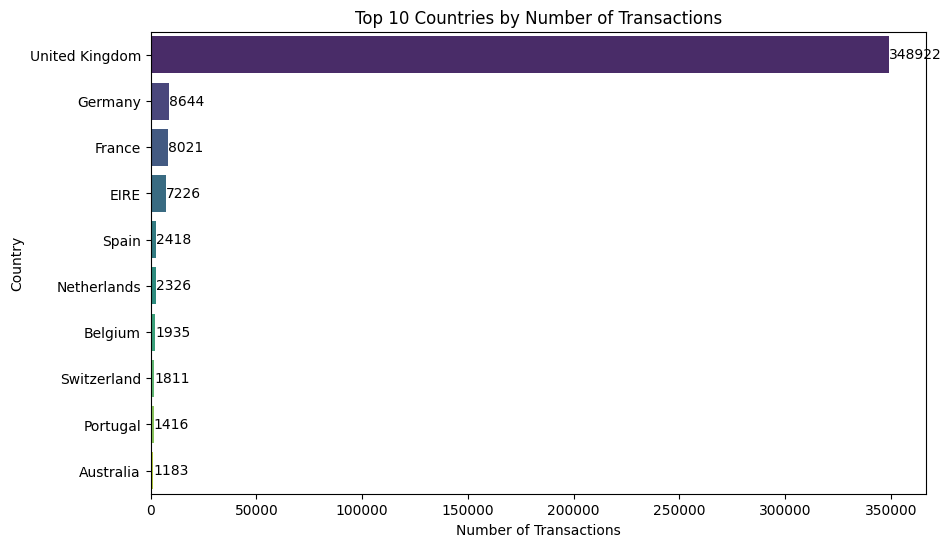

In [15]:
country_counts = data['Country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')
for index, value in enumerate(country_counts.values):
    plt.text(value + 100, index, str(value), color='black', va="center")

plt.title('Top 10 Countries by Number of Transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('Country')
plt.show()

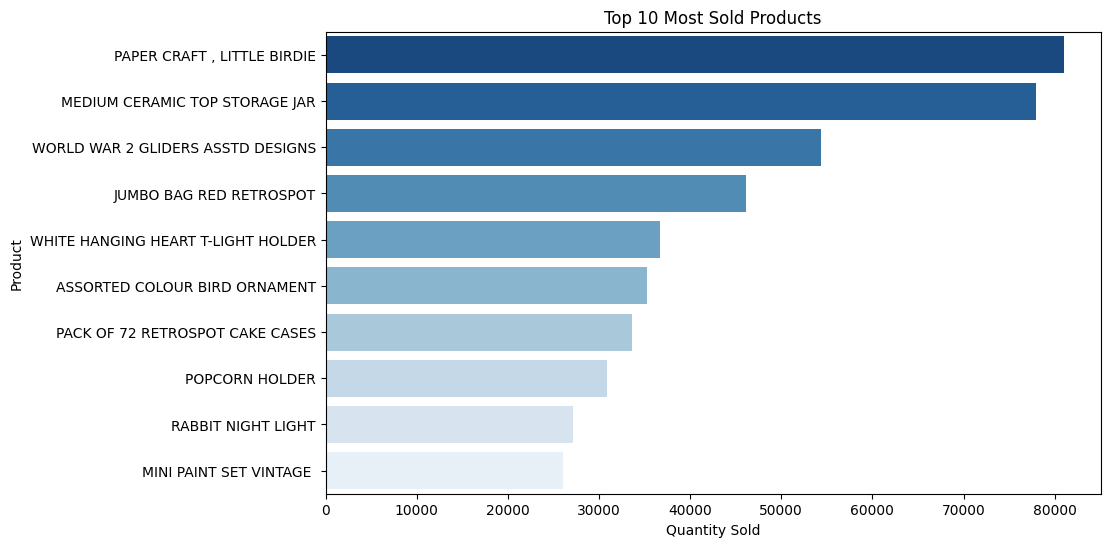

In [25]:
#Top 10 Most Sold Products & Qty
top_10_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_products.values, y=top_10_products.index, palette='Blues_r')

plt.title('Top 10 Most Sold Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product')
plt.show()

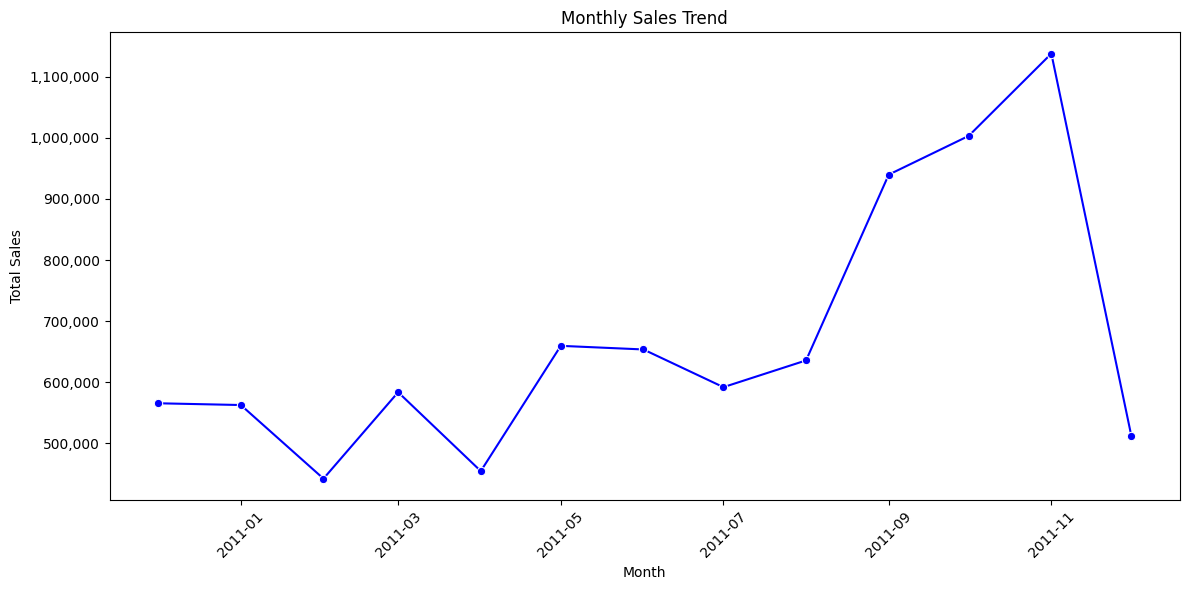

In [33]:
#Make InvoiceDate is a date-time object
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], errors='coerce')

#Create a Year-Month
data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')

#Group by Year-Month and calculate total sales
monthly_sales = data.groupby('YearMonth')['TotalPrice'].sum().reset_index()

#Convert the 'YearMonth' to date-time for proper plotting
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='TotalPrice', data=monthly_sales, marker='o', color='blue')

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


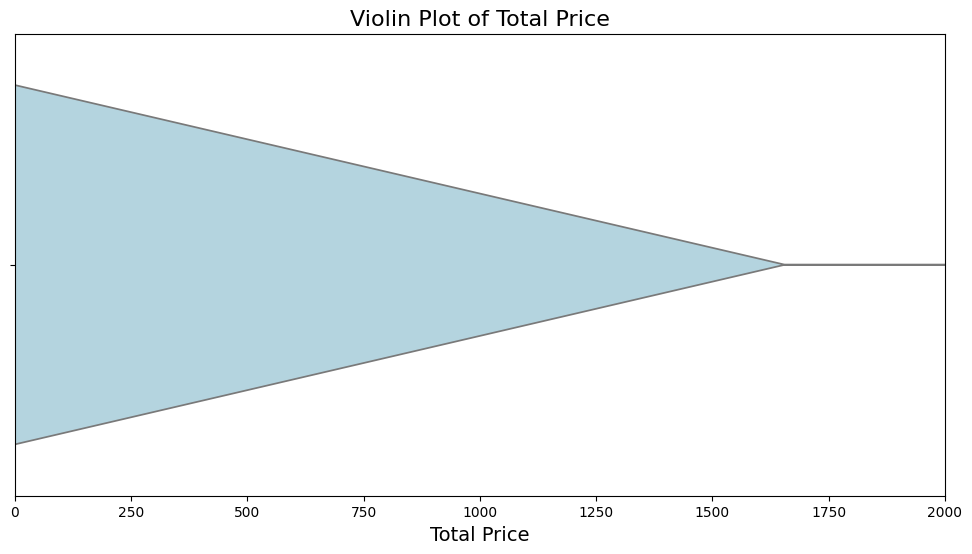

In [55]:
plt.figure(figsize=(12, 6))
sns.violinplot(x=data['TotalPrice'], inner=None, color='lightblue')

plt.xlim(0, 2000)

plt.title('Violin Plot of Total Price', fontsize=16)
plt.xlabel('Total Price', fontsize=14)

plt.show()